In this assignment you will experiment on your own. Using a health dataset of your choice (check with us if you are not sure), write code to demonstrate the following Pandas functions:<br />

Melt<br />
Pivot<br />
Aggregation<br />
Iteration<br />
Groupby<br />

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer = pd.read_csv('breast-cancer.data')

# got column names from .data file:
column_names = ["class", "age", "menopause", "tumor_size", "inv_nodes", "node_caps", "deg-malig", "breast", "breast_quad", "irradiat"]

# add column names to df for analysis:
df = pd.read_csv("breast-cancer.data", names = column_names)

In [12]:
df.head(20)

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg-malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [10]:
# make age and tumor size categorical, so they're ordered correctly
df['age']=pd.Categorical(df['age'],['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

df['tumor_size']=pd.Categorical(df['tumor_size'],["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"])

In [18]:
# Melt the dataframe to look only at tumor size for each individual.
df_melt = df.reset_index().melt(id_vars='index', value_vars = ['tumor_size'],
                 value_name = 'tumor size')

df_melt.head(10)

,index,variable,tumor size
0,0,tumor_size,30-34
1,1,tumor_size,20-24
2,2,tumor_size,20-24
3,3,tumor_size,15-19
4,4,tumor_size,0-4
5,5,tumor_size,15-19
6,6,tumor_size,25-29
7,7,tumor_size,20-24
8,8,tumor_size,50-54
9,9,tumor_size,20-24


<AxesSubplot:xlabel='tumor size', ylabel='index'>

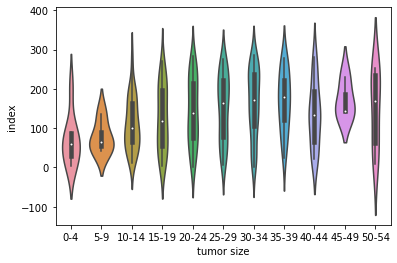

In [24]:
# can make density/violin plot after melting:
df_melt['tumor size']=pd.Categorical(df_melt['tumor size'],["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"])

sns.violinplot(data=df_melt, x="tumor size", y="index")

# source: https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [25]:
# restructure dataframe so that the columns are tumor size, and the values in the frame are age.
df_pivot = df.pivot(columns='tumor_size', values = 'age')
print(df_pivot)

tumor_size    0-4  5-9 10-14  15-19  20-24 25-29  30-34 35-39 40-44 45-49  \
0             NaN  NaN   NaN    NaN    NaN   NaN  30-39   NaN   NaN   NaN   
1             NaN  NaN   NaN    NaN  40-49   NaN    NaN   NaN   NaN   NaN   
2             NaN  NaN   NaN    NaN  40-49   NaN    NaN   NaN   NaN   NaN   
3             NaN  NaN   NaN  60-69    NaN   NaN    NaN   NaN   NaN   NaN   
4           40-49  NaN   NaN    NaN    NaN   NaN    NaN   NaN   NaN   NaN   
..            ...  ...   ...    ...    ...   ...    ...   ...   ...   ...   
281           NaN  NaN   NaN    NaN    NaN   NaN  30-39   NaN   NaN   NaN   
282           NaN  NaN   NaN    NaN  30-39   NaN    NaN   NaN   NaN   NaN   
283           NaN  NaN   NaN    NaN  60-69   NaN    NaN   NaN   NaN   NaN   
284           NaN  NaN   NaN    NaN    NaN   NaN  40-49   NaN   NaN   NaN   
285           NaN  NaN   NaN    NaN    NaN   NaN  50-59   NaN   NaN   NaN   

tumor_size 50-54  
0            NaN  
1            NaN  
2            NaN  

In [26]:
# restructure dataframe so that the columns are tumor size, and the values in the frame are tumor location (breast quadrant).
df.pivot(columns='tumor_size', values = 'breast_quad')

tumor_size,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54
0,NaN,NaN,NaN,NaN,NaN,NaN,left_low,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,right_up,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,left_low,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,left_up,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,right_low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
281,NaN,NaN,NaN,NaN,NaN,NaN,left_up,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,left_up,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,left_up,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,left_low,NaN,NaN,NaN,NaN


In [28]:
# Aggregate the min and max values of the numerical columns:

# gotta rever to NOT categorical before I can do this:
df2 = pd.read_csv("breast-cancer.data", names = column_names)

df2.aggregate({"age":['min', 'max'],
              "tumor_size": ['min', 'max'],
              "inv_nodes": ['min', 'max'],
              "deg-malig": ['min', 'max']})

,age,tumor_size,inv_nodes,deg-malig
min,20-29,0-4,0-2,1
max,70-79,50-54,9-11,3


In [29]:
# Iterate through the column names to get a list of the variables included in this data set:
# source: https://www.tutorialspoint.com/python_pandas/python_pandas_iteration.htm
df_iter = pd.DataFrame(df)
for col in df:
    print(col)

class
age
menopause
tumor_size
inv_nodes
node_caps
deg-malig
breast
breast_quad
irradiat


In [30]:
# Compare average degree of malignancy by age group
df_byage = df.groupby(['age']).mean(['deg-malig'])
df_byage.head()

,deg-malig
age,
20-29,2.000000
30-39,2.138889
40-49,2.066667
50-59,2.072917
60-69,1.982456


In [31]:
# Compare average degree of malignancy varies by class
df_byclass = df.groupby(['class']).mean(['deg-malig'])
df_byclass.head()

,deg-malig
class,
no-recurrence-events,1.905473
recurrence-events,2.388235


In [32]:
# Determine the class distribution of breast cancer cases included in this data set
df.groupby(['class']).count()

,age,menopause,tumor_size,inv_nodes,node_caps,deg-malig,breast,breast_quad,irradiat
class,,,,,,,,,
no-recurrence-events,201,201,201,201,201,201,201,201,201
recurrence-events,85,85,85,85,85,85,85,85,85


In [33]:
# Determine the distribution of tumor location in this data set
df.groupby(['breast_quad']).count()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg-malig,breast,irradiat
breast_quad,,,,,,,,,
?,1,1,1,1,1,1,1,1,1
central,21,21,21,21,21,21,21,21,21
left_low,110,110,110,110,110,110,110,110,110
left_up,97,97,97,97,97,97,97,97,97
right_low,24,24,24,24,24,24,24,24,24
right_up,33,33,33,33,33,33,33,33,33
